In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sns.set(style='whitegrid')

Step 1: Load and Analyse the Dataset

In [3]:
newsgroups = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
texts = newsgroups.data
labels = newsgroups.target
target_names = newsgroups.target_names
print(f"Total number of documents: {len(texts)}")
print(f"Number of categories: {len(target_names)}")
print(texts[0][:500])
print(target_names[labels[0]])

Total number of documents: 11314
Number of categories: 20
I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.
rec.autos


Step 2: Apply TF-IDF Vectorization

In [6]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_tfidf = vectorizer.fit_transform(texts)
print("Shape of raw matrix:", X_tfidf.shape)
print("Number of features:", len(vectorizer.get_feature_names_out()))

Shape of raw matrix: (11314, 10000)
Number of features: 10000


Step 3:Apply Truncated SVD for Dimensionality Reduction

Shape after SVD: (11314, 2)


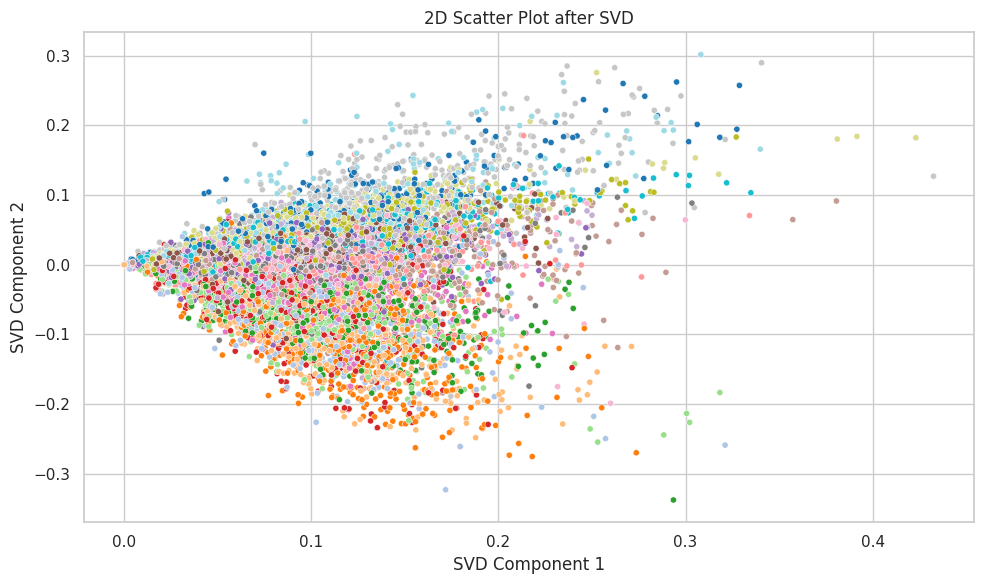

In [7]:
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_tfidf)
print("Shape after SVD:", X_svd.shape)
df_svd = pd.DataFrame({
    "Component 1": X_svd[:, 0],
    "Component 2": X_svd[:, 1],
    "Label": labels
})
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_svd, x="Component 1", y="Component 2", hue="Label", palette="tab20", legend=None, s=20)
plt.title("2D Scatter Plot after SVD")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.tight_layout()
plt.show()

Step 4: K-Means Clustering + Silhouette Score

Silhouette Score: 0.3286


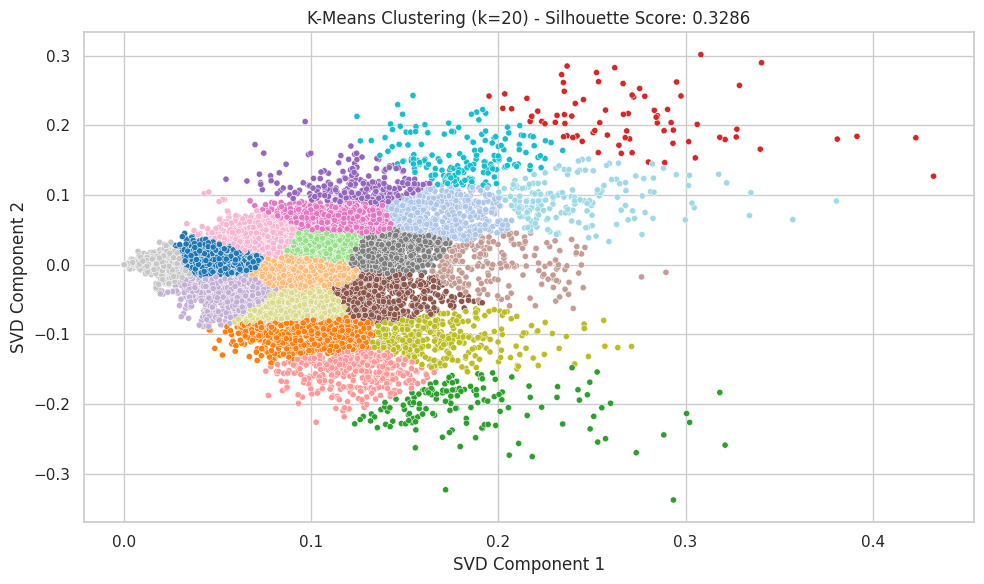

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=20, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(X_svd)
score = silhouette_score(X_svd, kmeans_labels)
print(f"Silhouette Score: {score:.4f}")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], hue=kmeans_labels, palette="tab20", s=20, legend=None)
plt.title(f"K-Means Clustering (k=20) - Silhouette Score: {score:.4f}")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.tight_layout()
plt.show()

##Summary:
After converting the text into a sparse TF-IDF matrix, we applied Truncated SVD to reduce it to 2 components for visualization. A 2D scatter plot showed how documents are distributed in reduced space. Using K-Means clustering (k=20), we grouped similar texts, and got a **Silhouette Score of 0.3286**, showing reasonable topic separation without using labels.

###Code Outputs:

- **Number of documents**: 11314
- **Number of categories**: 20
- **TF-IDF Matrix Shape**: (11314, 10000)
- **SVD Output Shape**: (11314, 2)

####Why dimensionality reduction is used:
TF-IDF matrices are typically high-dimensional and sparse, which can be computationally expensive and hard to visualize. Dimensionality reduction helps to reduce noise and complexity.

####What SVD/PCA achieves:
SVD or PCA reduces the feature space while preserving the most important variance in the data, enabling efficient 2D/3D visualizations.

####How clustering helps understand the structure of data without labels:
Clustering groups similar documents based on feature patterns, revealing hidden structures and topic groupings even without knowing the actual categories, making it useful for unsupervised analysis.